In [ ]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [7]:
# 데이터셋 로드
df = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
# 데이터 기본 정보 확인

print("### 데이터 상위 5개 행 ###")
display(df.head())
print("\n### 데이터 기본 정보 ###")
df.info()

### 데이터 상위 5개 행 ###


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



### 데이터 기본 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLe

Attrition
No     1233
Yes     237
Name: count, dtype: int64


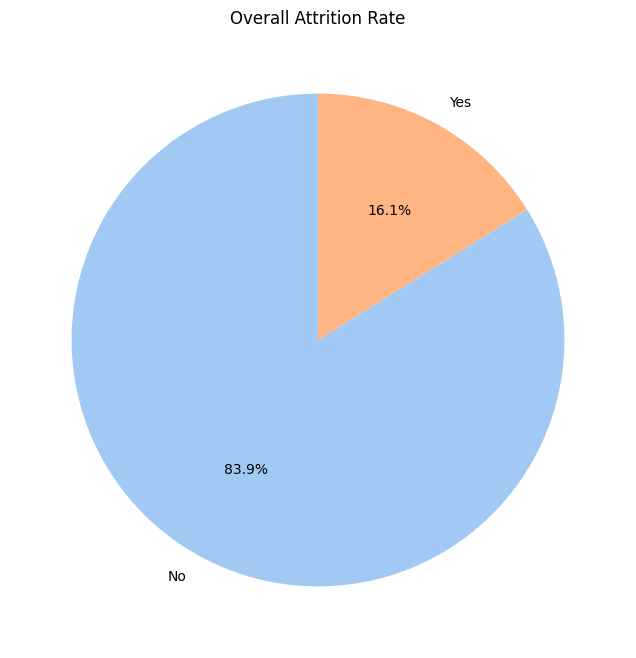

In [11]:
#전체 퇴사율 분석

# 'Attrition' 컬럼의 값별 개수 세기
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

# Matplotlib을 이용한 파이 차트
plt.figure(figsize=(8, 8))
plt.pie(
    attrition_counts,
    labels=attrition_counts.index,
    autopct='%1.1f%%', # 퍼센트 표시
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Overall Attrition Rate')
plt.show()

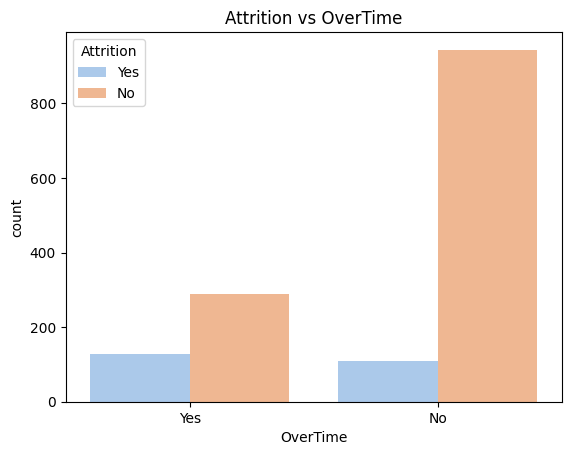


초과 근무 여부에 따른 퇴사 비율 (%):
Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


In [12]:
# 초과 근무와 퇴사의 관계 분석

# Seaborn을 사용한 카운트 플롯
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='pastel')
plt.title('Attrition vs OverTime')
plt.show()

# Crosstab을 이용한 비율 계산
overtime_crosstab = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
print("\n초과 근무 여부에 따른 퇴사 비율 (%):")
print(overtime_crosstab)

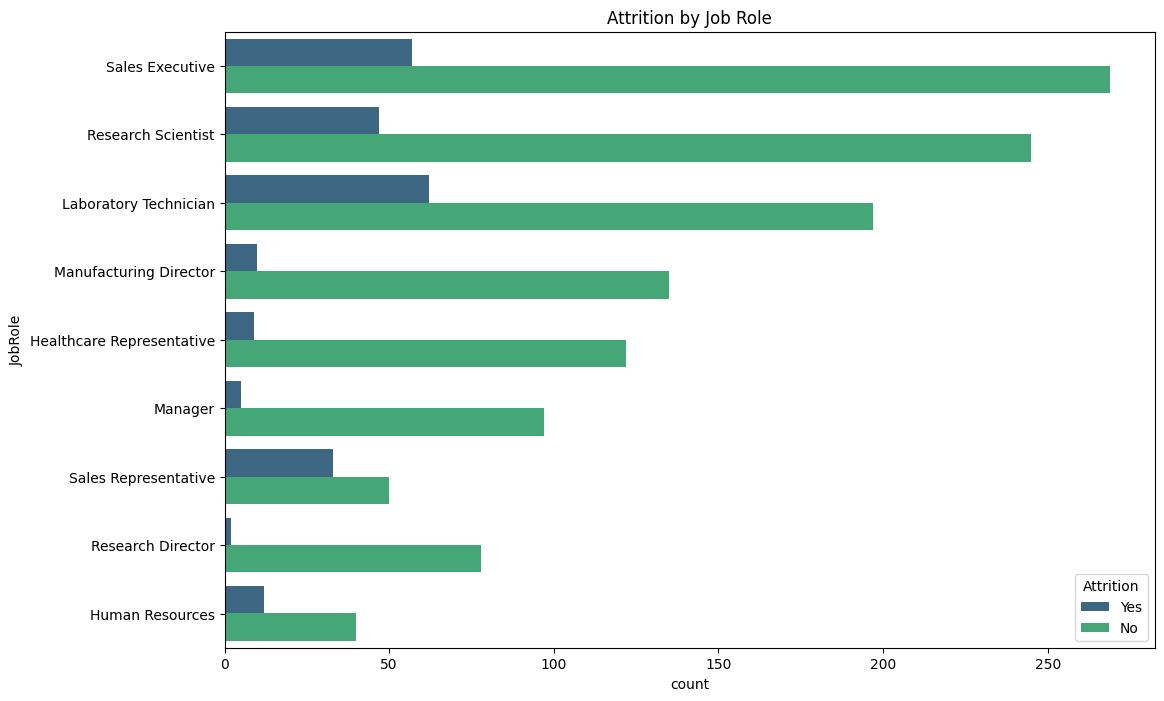

In [13]:
# 직무별 퇴사 현황 분석

plt.figure(figsize=(12, 8)) # 차트 크기 조절
sns.countplot(y='JobRole', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition by Job Role')
plt.show()

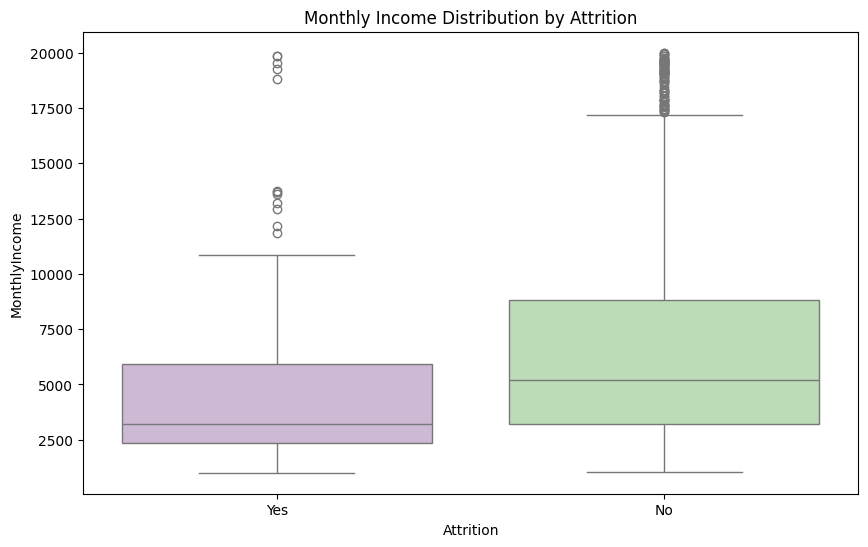

In [14]:
#월 소득과 퇴사의 관계

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='PRGn')
plt.title('Monthly Income Distribution by Attrition')
plt.show()

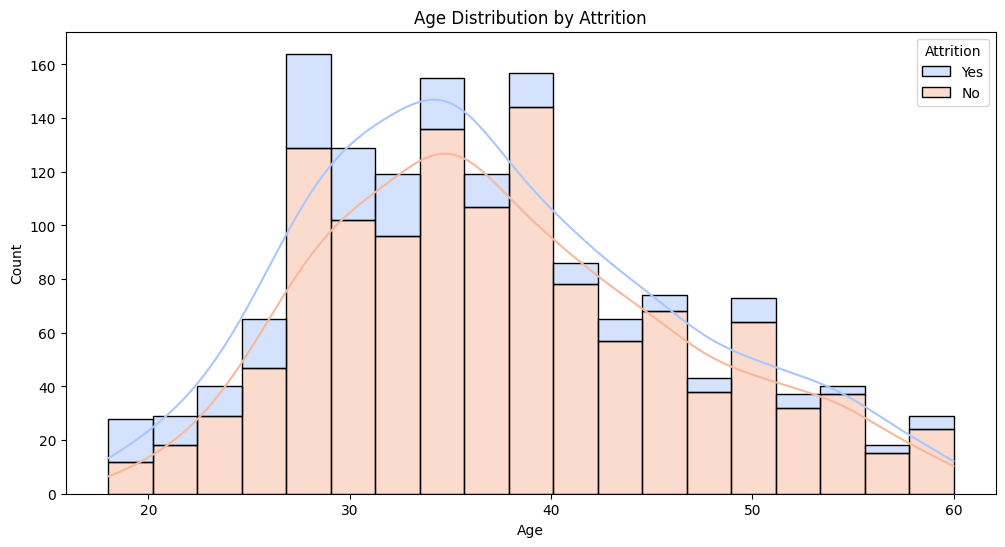

In [15]:
#나이와 퇴사의 관계

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', kde=True, palette='coolwarm')
plt.title('Age Distribution by Attrition')
plt.show()

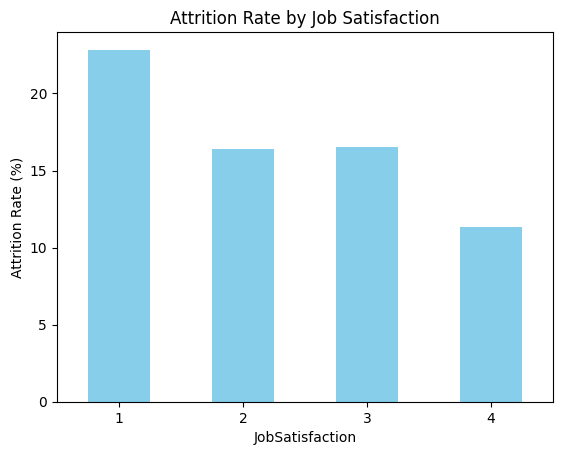

In [16]:
#직무 만족도와 퇴사의 관계

# 직무 만족도별 퇴사율 계산을 위해 crosstab 사용
satisfaction_crosstab = pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index') * 100

# 막대 그래프로 시각화
satisfaction_crosstab['Yes'].plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Job Satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.show()